# **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '../data/1832_v4.xlsx'
JOB_PATH = "../data/classification_metiers.csv"
ORIGIN_PATH = "../data/classification_origines.csv"
OUTPUT_PATH = "../data/1832_v4_preprocessed.csv"

In [2]:
rec = pd.read_excel(
    DATA_PATH, 
    index_col=0,
    na_values=['·', 'ne', 'nee']
)
rec = rec[[
    "nom_rue_norm_2",
    "no_maison",
    "chef_annee_naissance",
    "chef_origine_norm_2",
    "chef_annee_arrivee",
    "chef_vocation_norm_2",
    "Page",
    'Division'
]]
rec = rec.rename(columns={
    "nom_rue_norm_2": "nom_rue",
    "chef_origine_norm_2": "chef_origine",
    "chef_vocation_norm_2": "chef_vocation",
    "Page" : "page",
    "Division" : "division"
})

print(f'Number of records: {len(rec)}')
rec.head()

Number of records: 3674


,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division
1,marterey,1,1764,tolochenaz,1786,charon,1,1-2
2,marterey,2,17936,rolle,1821,marechal-ferrant,1,1-2
3,marterey,3,1785,pailly,NaN,lingere,1,1-2
4,marterey,NaN,NaN,gingins,NaN,rentier,1,1-2
5,marterey,NaN,1802,lutry,NaN,garcon voiturier,1,1-2


## **Process House Number**

In [3]:
# Replace all values not numeric by NaN in no_maison
nans_before = rec['no_maison'].isna().sum().sum()
rec['no_maison'] = pd.to_numeric(rec['no_maison'], errors='coerce')
nans_after = rec['no_maison'].isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 23


In [4]:
# Set nan to house numbers that are not in the range [MAX_HOUSE_NUMBER, MIN_HOUSE_NUMBER]
MAX_HOUSE_NUMBER = 1
MIN_HOUSE_NUMBER = 100
nans_before = rec['no_maison'].isna().sum().sum()
rec.loc[rec['no_maison'] > MIN_HOUSE_NUMBER, 'no_maison'] = np.nan
rec.loc[rec['no_maison'] < MAX_HOUSE_NUMBER, 'no_maison'] = np.nan
nans_after = rec['no_maison'].isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 11


In [5]:
# Fill forward no_maison
rec['no_maison'] = rec['no_maison'].fillna(method='ffill')
rec['no_maison'] = rec['no_maison'].astype(int)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division
1,marterey,1,1764,tolochenaz,1786,charon,1,1-2
2,marterey,2,17936,rolle,1821,marechal-ferrant,1,1-2
3,marterey,3,1785,pailly,NaN,lingere,1,1-2
4,marterey,3,NaN,gingins,NaN,rentier,1,1-2
5,marterey,3,1802,lutry,NaN,garcon voiturier,1,1-2


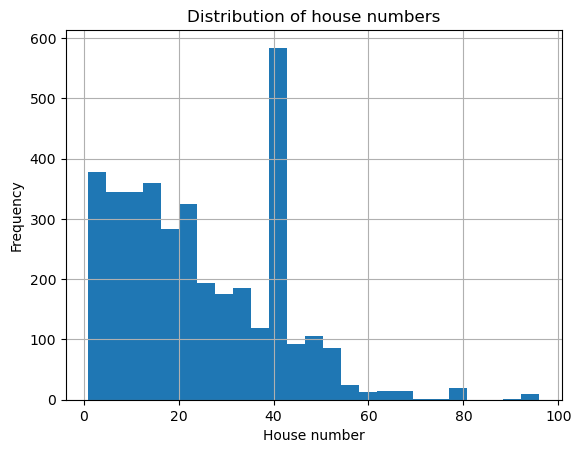

In [6]:
# Show the distribution of the house numbers
rec['no_maison'].hist(bins=25)
plt.title('Distribution of house numbers')
plt.xlabel('House number')
plt.ylabel('Frequency')
plt.show()

## **Process Birth Year**

In [7]:
# Replace all values not numeric by NaN in chef_annee_naissance
nans_before = rec.isna().sum().sum()
rec['chef_annee_naissance'] = pd.to_numeric(rec['chef_annee_naissance'], errors='coerce')
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 27


In [8]:
# Set nan to people that are more than 100 years old, and less than 10
YEAR = 1832
nans_before = rec.isna().sum().sum()
rec.loc[rec['chef_annee_naissance'] < YEAR - 100, 'chef_annee_naissance'] = np.nan
rec.loc[rec['chef_annee_naissance'] > YEAR - 10, 'chef_annee_naissance'] = np.nan
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 160


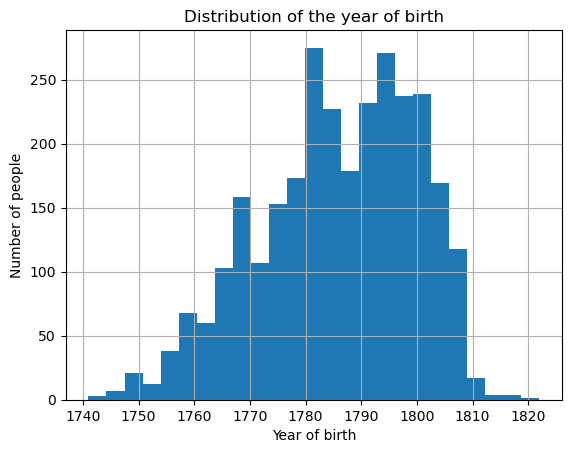

In [9]:
# Show the distribution of the year of birth
rec['chef_annee_naissance'].hist(bins=25)
plt.title('Distribution of the year of birth')
plt.xlabel('Year of birth')
plt.ylabel('Number of people')
plt.show()

## **Process Arrival Year**

In [10]:
# Replace all values not numeric by NaN in chef_annee_naissance
nans_before = rec.isna().sum().sum()
rec['chef_annee_arrivee'] = pd.to_numeric(rec['chef_annee_arrivee'], errors='coerce')
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 54


In [11]:
# Set nan to people that came more than 100 years before 1832, and after 1832
YEAR = 1832
nans_before = rec.isna().sum().sum()
rec.loc[rec['chef_annee_arrivee'] < YEAR - 100, 'chef_annee_arrivee'] = np.nan
rec.loc[rec['chef_annee_arrivee'] > YEAR, 'chef_annee_arrivee'] = np.nan
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 35


Text(0, 0.5, 'Number of people')

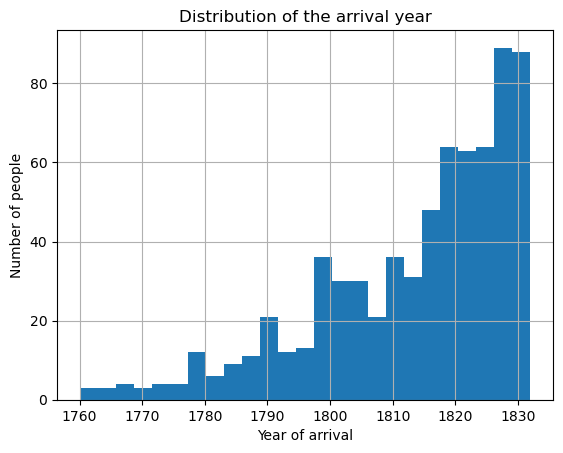

In [12]:
# Show the distribution of the arrival year
rec['chef_annee_arrivee'].hist(bins=25)
plt.title('Distribution of the arrival year')
plt.xlabel('Year of arrival')
plt.ylabel('Number of people')

## **Process Job**

In [13]:
job_classifications = pd.read_csv(JOB_PATH)
job_classifications.head() 

,job,class
0,rentier,rente
1,rentiere,rente
2,journalier,agricole
3,vigneron,agricole
4,proprietaire,rente


In [14]:
rec = rec.merge(job_classifications, left_on="chef_vocation", right_on="job", how="left")
rec = rec.drop(columns=["job"])
rec = rec.rename(columns={"class": "chef_vocation_class"})
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1-2,NaN
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1-2,artisanat
2,marterey,3,1785.0,pailly,NaN,lingere,1,1-2,service
3,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente
4,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente


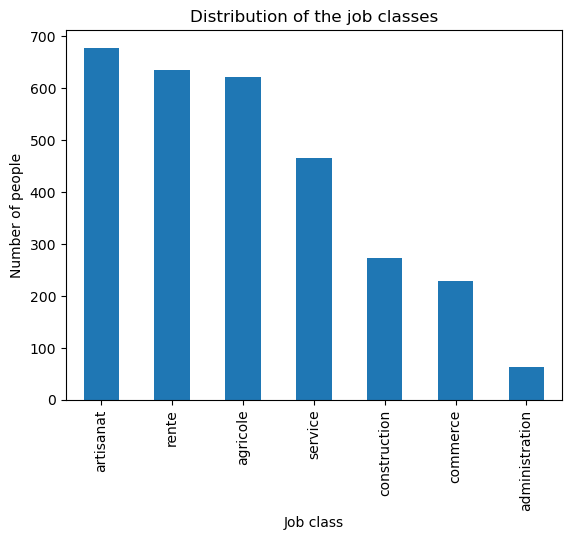

In [15]:
# Bar plot of the distribution of the job classes
rec['chef_vocation_class'].value_counts().plot(kind='bar')
plt.title('Distribution of the job classes')
plt.xlabel('Job class')
plt.ylabel('Number of people')
plt.show()

## **Process Origin**

In [16]:
origin_classifications = pd.read_csv(ORIGIN_PATH)
origin_classifications.head() 

,origin,class
0,lutry,lavaux
1,epalinges,lausanne
2,villette,lavaux
3,le mont-sur-lausanne,lausanne
4,corporation vaudoise,vaud


In [17]:
rec = rec.merge(origin_classifications, left_on="chef_origine", right_on="origin", how="left")
rec = rec.drop(columns=["origin"])
rec = rec.rename(columns={"class": "chef_origine_class"})
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1-2,NaN,morges
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1-2,artisanat,rolle
2,marterey,3,1785.0,pailly,NaN,lingere,1,1-2,service,moudon
3,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente,NaN
4,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente,NaN


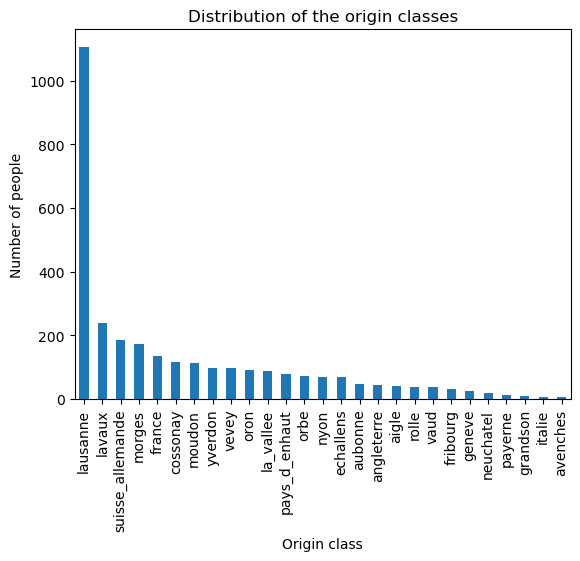

In [18]:
# Bar plot of the distribution of the origin classes
rec['chef_origine_class'].value_counts().plot(kind='bar')
plt.title('Distribution of the origin classes')
plt.xlabel('Origin class')
plt.ylabel('Number of people')
plt.show()

## **Process Districs**

In [19]:
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1-2,NaN,morges
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1-2,artisanat,rolle
2,marterey,3,1785.0,pailly,NaN,lingere,1,1-2,service,moudon
3,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente,NaN
4,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente,NaN


In [20]:
# Merge 7 and 7-8
rec.loc[rec['division'] == '7-8', 'division'] = 7

# Rename 1-2 to 1
rec.loc[rec['division'] == '1-2', 'division'] = 1

# Make them incremental integers
INCREMENT_INTEGER_MAP = {
    1: 1,
    3: 2,
    4: 3,
    5: 4,
    6: 5,
    7: 6,
    9: 7,
    10: 8,
    11: 9,
    12: 10,
    13: 11,
    14: 12,
    15: 13,
    16: 14,
    17: 15,
    18: 16,
    19: 17,
    20: 18,
}
rec['division'] = rec['division'].map(INCREMENT_INTEGER_MAP)

In [21]:
# Add supdistricts
SUPDIVISION_MAP = {
    1: 'culture',
    2: 'centre',
    3: 'affaires',
    4: 'affaires',
    5: 'centre',
    6: 'centre',
    7: 'commerce',
    8: 'commerce',
    9: 'commerce',
    10: 'commerce',
    11: 'commerce',
    12: 'cathedrale',
    13: 'cathedrale',
    14: 'cathedrale',
    15: 'campagne',
    16: 'campagne',
    17: 'campagne',
    18: 'campagne',
}
rec['division_class'] = rec['division'].map(SUPDIVISION_MAP)

rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture


In [22]:
# Add division name as road name with most entries per division
division_names = rec.groupby('division')['nom_rue'].agg(lambda x: x.value_counts().index[0])
# change division index 6 to montee st francois
division_names[5] = 'montee st francois'
division_names[6] = 'rue du pont'
rec = rec.merge(division_names, left_on='division', right_index=True, how='left')
rec = rec.rename(columns={'nom_rue_x': 'nom_rue', 'nom_rue_y': 'division_name'})
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture,marterey
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture,marterey
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey


In [23]:
rec[['division', 'division_name']].drop_duplicates().sort_values(by='division')

,division,division_name
0,1,marterey
504,2,cheneau de bourg
702,3,bourg
902,4,place st francois
1095,5,montee st francois
1243,6,rue du pont
1584,7,montee de st laurent
1676,8,grand st jean
1957,9,st laurent
2210,10,ale


In [24]:
rec['division_name'] = rec['division_name'].str.replace(' ', '_')
rec['division_name'] = rec['division_name'].str.replace('-', '_')

## **Check NaNs**

In [25]:
rec.isna().sum()

nom_rue                    0
no_maison                  0
chef_annee_naissance     842
chef_origine             143
chef_annee_arrivee      3069
chef_vocation            300
page                       0
division                   0
chef_vocation_class      841
chef_origine_class       744
division_class             0
division_name              0
dtype: int64

## **Save data**

In [26]:
rec.to_csv(OUTPUT_PATH, index=False)